In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

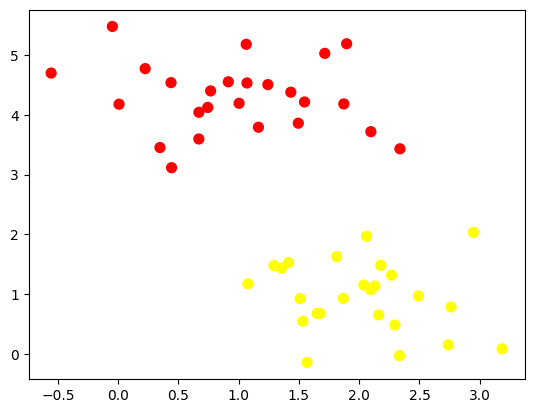

In [9]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

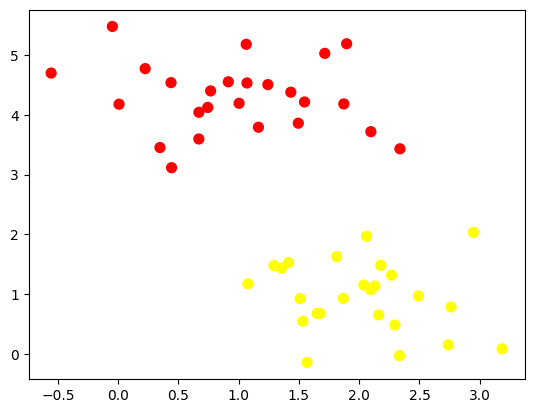

In [10]:
y = np.where(y == 0, -1, 1) # convert 0 to -1 for perceptron

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [11]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # loop through dataset multiple times
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)  # predict using current weights

                # update only if misclassified
                if y[idx] * linear_output <= 0: # is the point misclassified?
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)

Perceptron Accuracy: 1.0


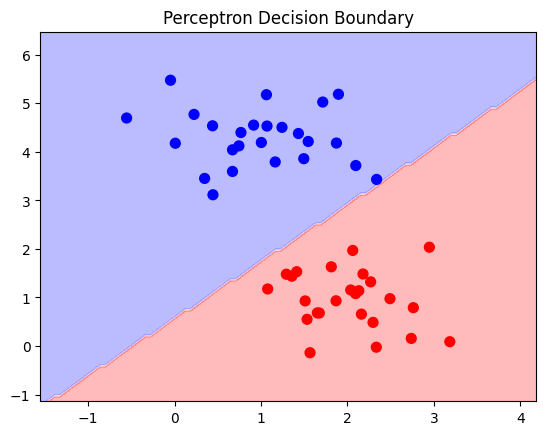

In [ ]:
# train perceptron
ppn = Perceptron(learning_rate=0.1, n_iters=1000)
ppn.fit(X, y)

# test accuracy
acc = ppn.score(X, y)
print("Perceptron Accuracy:", acc)

# visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = ppn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()